In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"D:\Study\Project\Major project\24 hours\jewellery\comment_count_24_hours_jewellery.xlsx")

In [3]:
df.head()

,Influencers,1H_Comment_Counts,2H_Comment_Counts,3H_Comment_Counts,4H_Comment_Counts,5H_Comment_Counts,6H_Comment_Counts,7H_Comment_Counts,8H_Comment_Counts,9H_Comment_Counts,...,15H_Comment_Counts,16H_Comment_Counts,17H_Comment_Counts,18H_Comment_Counts,19H_Comment_Counts,20H_Comment_Counts,21H_Comment_Counts,22H_Comment_Counts,23H_Comment_Counts,24H_Comment_Counts
0,03arpitasingh,1.000000,6.000000,6.000000,9.000000,10.000000,13.000000,13.000000,13.000000,13.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
1,404writer,4.000000,8.000000,13.000000,15.000000,15.000000,17.000000,19.000000,19.000000,20.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000
2,431_88,0.074074,0.148148,0.148148,0.148148,0.148148,0.148148,0.148148,0.148148,11.259259,...,14.962963,14.962963,14.962963,14.962963,14.962963,16.814815,16.814815,17.740741,17.740741,19.666667
3,6shweta,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
4,@raw_mango,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
for i in range(1, 25):
    df[f'{i}H_Comment_Counts'] = df[f'{i}H_Comment_Counts'].apply(lambda x: np.ceil(x))


In [5]:
df['Saturation'] = ''
df['Hour_of_saturation'] = ''

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Get the columns representing the comment counts for each day
    comment_count_cols = row.index[1:]

    # Initialize a flag to track saturation
    saturated = False
    day = 0

    # Iterate over the columns representing the comment counts for each day
    for i in range(len(comment_count_cols) - 4):
        # Get the comment counts for three consecutive days
        three_day_counts = row[comment_count_cols[i:i+5]]

        # Check if the comment counts for the three consecutive days are the same
        if three_day_counts.nunique() == 1:
            saturated = True
            day = i
            break  # Exit the loop if saturation is found

    # Update the saturation status in the DataFrame
    if saturated:
        df.at[index, 'Saturation'] = 'Saturated'
        df.at[index, 'Hour_of_saturation'] = day
    else:
        df.at[index, 'Saturation'] = 'Not Saturated'

print(df)


               Influencers  1H_Comment_Counts  2H_Comment_Counts  \
0            03arpitasingh                1.0                6.0   
1                404writer                4.0                8.0   
2                   431_88                1.0                1.0   
3                  6shweta                0.0                1.0   
4               @raw_mango                1.0                1.0   
...                    ...                ...                ...   
2698            zoyajewels                0.0                0.0   
2699  zuhairmuradofficial.                2.0                3.0   
2700              zuriador                1.0                2.0   
2701           zuziazawada                1.0                2.0   
2702        zwaan.official                0.0                0.0   

      3H_Comment_Counts  4H_Comment_Counts  5H_Comment_Counts  \
0                   6.0                9.0               10.0   
1                  13.0               15.0           

In [6]:
df.head()

,Influencers,1H_Comment_Counts,2H_Comment_Counts,3H_Comment_Counts,4H_Comment_Counts,5H_Comment_Counts,6H_Comment_Counts,7H_Comment_Counts,8H_Comment_Counts,9H_Comment_Counts,...,17H_Comment_Counts,18H_Comment_Counts,19H_Comment_Counts,20H_Comment_Counts,21H_Comment_Counts,22H_Comment_Counts,23H_Comment_Counts,24H_Comment_Counts,Saturation,Hour_of_saturation
0,03arpitasingh,1.0,6.0,6.0,9.0,10.0,13.0,13.0,13.0,13.0,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,Saturated,9
1,404writer,4.0,8.0,13.0,15.0,15.0,17.0,19.0,19.0,20.0,...,21.0,21.0,21.0,22.0,22.0,22.0,22.0,22.0,Saturated,9
2,431_88,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,...,15.0,15.0,15.0,17.0,17.0,18.0,18.0,20.0,Saturated,0
3,6shweta,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Saturated,1
4,@raw_mango,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Saturated,0


In [7]:
df.to_excel('4H_saturated_jewellery_hour1_to_hour24.xlsx', index=False)

In [7]:
df = pd.read_excel(r"D:\Study\Project\Major project\4H_saturated_jewellery_hour1_to_hour24.xlsx")

In [8]:
df.head()

,Influencers,1H_Comment_Counts,2H_Comment_Counts,3H_Comment_Counts,4H_Comment_Counts,5H_Comment_Counts,6H_Comment_Counts,7H_Comment_Counts,8H_Comment_Counts,9H_Comment_Counts,...,17H_Comment_Counts,18H_Comment_Counts,19H_Comment_Counts,20H_Comment_Counts,21H_Comment_Counts,22H_Comment_Counts,23H_Comment_Counts,24H_Comment_Counts,Saturation,Hour_of_saturation
0,03arpitasingh,1,6,6,9,10,13,13,13,13,...,14,14,14,14,14,14,14,14,Saturated,9.0
1,404writer,4,8,13,15,15,17,19,19,20,...,21,21,21,22,22,22,22,22,Saturated,9.0
2,431_88,1,1,1,1,1,1,1,1,12,...,15,15,15,17,17,18,18,20,Saturated,0.0
3,6shweta,0,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,Saturated,1.0
4,@raw_mango,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,Saturated,0.0


In [10]:
df['Saturation'].value_counts()

Saturation
Saturated        2686
Not Saturated      17
Name: count, dtype: int64

In [9]:
df['Hour_of_saturation'].value_counts()

Hour_of_saturation
0.0     1250
1.0      335
2.0      235
3.0      186
4.0      165
7.0      140
5.0      137
6.0       95
8.0       41
9.0       40
10.0      20
12.0      12
11.0      12
13.0       8
14.0       4
15.0       3
19.0       2
17.0       1
Name: count, dtype: int64

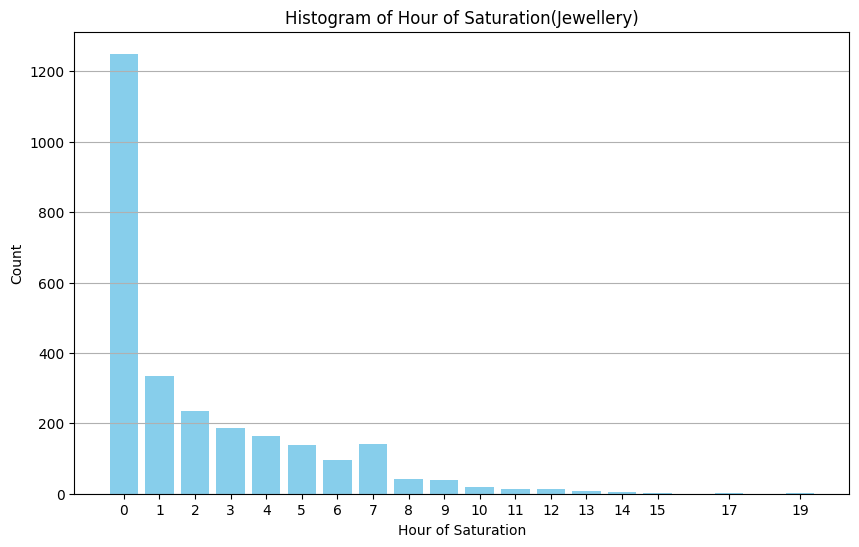

In [11]:
import matplotlib.pyplot as plt

hour_counts = df['Hour_of_saturation'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.xlabel('Hour of Saturation')
plt.ylabel('Count')
plt.title('Histogram of Hour of Saturation(Jewellery)')
plt.xticks(hour_counts.index)  # Ensures all hours are shown on x-axis
plt.grid(axis='y')

plt.show()

In [12]:
shoes_df = pd.read_excel(r"D:\Study\Project\Major project\4H_saturated_shoes_hour1_to_hour24.xlsx")

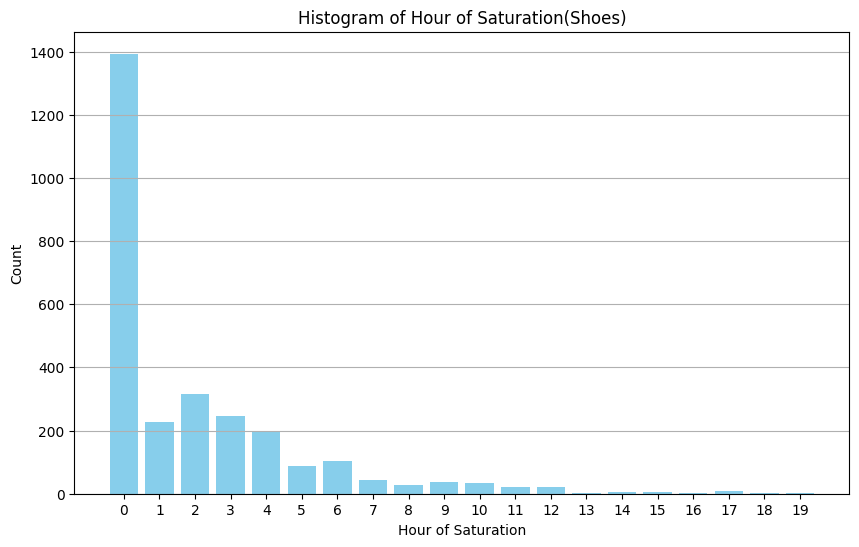

In [13]:
hour_counts = shoes_df['Hour_of_saturation'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.xlabel('Hour of Saturation')
plt.ylabel('Count')
plt.title('Histogram of Hour of Saturation(Shoes)')
plt.xticks(hour_counts.index)  # Ensures all hours are shown on x-axis
plt.grid(axis='y')

plt.show()

In [13]:
mean = df['Day_of_saturation'].mean()
mean

1.2004976892996801

In [14]:
std = df['Day_of_saturation'].std()
std

1.781535541185598

In [15]:
df.isnull().sum()

Influencers          0
1D                   0
2D                   0
3D                   0
4D                   0
5D                   0
6D                   0
7D                   0
8D                   0
9D                   0
10D                  0
11D                  0
12D                  0
13D                  0
14D                  0
Saturation           0
Day_of_saturation    7
dtype: int64

In [16]:
# Convert "Day_of_saturation" column to numeric type, coercing errors to NaN
df['Day_of_saturation'] = pd.to_numeric(df['Day_of_saturation'], errors='coerce')

# Drop rows with NaN values, assuming that you want to exclude them from the analysis
df.dropna(subset=['Day_of_saturation'], inplace=True)

# Convert "Day_of_saturation" column to integer type
df['Day_of_saturation'] = df['Day_of_saturation'].astype(int)


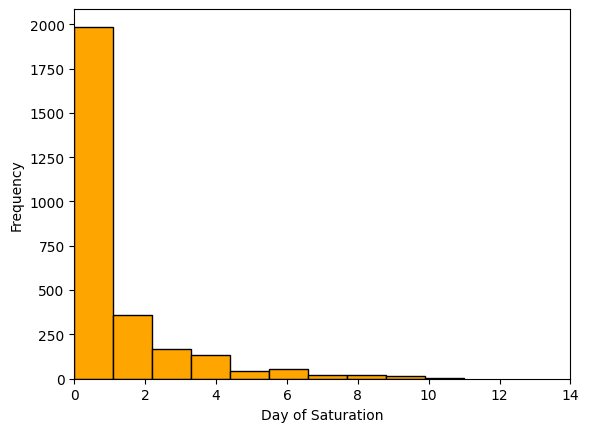

In [17]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the "Day_of_saturation" column
plt.hist(df['Day_of_saturation'], bins=10, color='orange', edgecolor='black')
plt.xlabel('Day of Saturation')
plt.ylabel('Frequency')
plt.xlim(0,14)
# plt.title('Histogram of Day of Saturation(Automobile)')
plt.show()


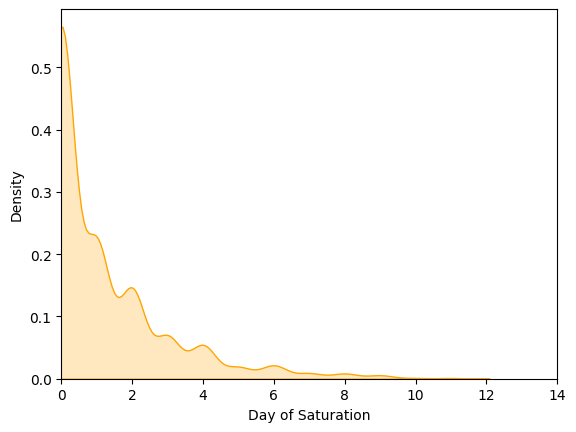

In [18]:
import seaborn as sns

# Assuming you have a DataFrame named df with the "Day_of_saturation" column
sns.kdeplot(data=df['Day_of_saturation'], shade=True, color='orange')
plt.xlabel('Day of Saturation')
plt.ylabel('Density')
plt.xlim(0,14)
# plt.title('KDE Plot of Day of Saturation(food)')
plt.show()


In [19]:
df = pd.read_excel(r'D:\Study\Project\Minor Project\saturated_shoes_day1_to_day14.xlsx')

In [20]:
df['Day_of_saturation'].value_counts()

Day_of_saturation
0.0     1441
1.0      545
2.0      360
3.0      169
4.0      135
6.0       54
5.0       46
7.0       22
8.0       21
9.0       14
10.0       3
11.0       3
Name: count, dtype: int64

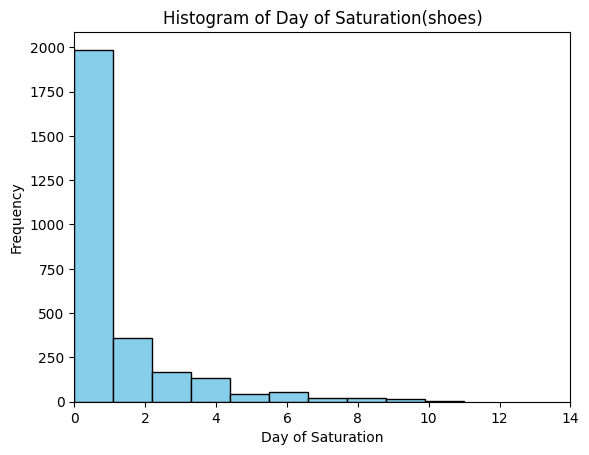

In [21]:
plt.hist(df['Day_of_saturation'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Day of Saturation')
plt.ylabel('Frequency')
plt.xlim(0,14)
plt.title('Histogram of Day of Saturation(shoes)')
plt.show()


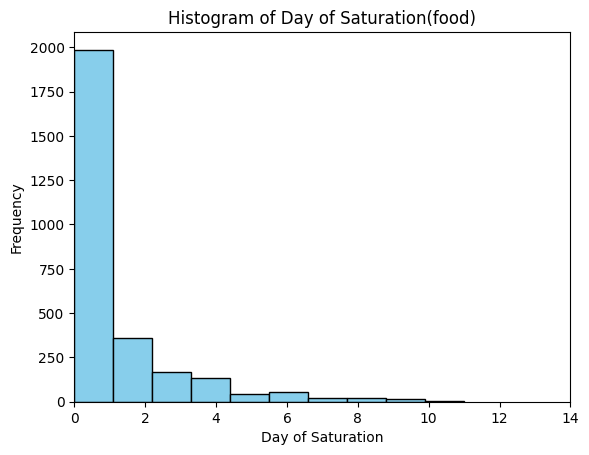

In [22]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the "Day_of_saturation" column
plt.hist(df['Day_of_saturation'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Day of Saturation')
plt.ylabel('Frequency')
plt.xlim(0,14)
plt.title('Histogram of Day of Saturation(food)')
plt.show()
